<a href="https://colab.research.google.com/github/SanBartolome/IA-diploma-course-2021/blob/main/DAVA_Arquitecturas_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo de Aplicaciones con Visión Artificial: Semana 6

En este notebook aprenderás a utilizar modelos pre entrenados de arquitecturas clásicas de redes neuronales convolucionales (CNN) con PyTorch.

### torchvision.models

Contiene definiciones de modelos para bordar diferentes tareas, que incluyen: clasificación de imágenes, segmentación semántica por pixeles, detección de objetos, segmentación de instancias, detección de keypoints de personas y clasificación de videos.

In [ ]:
import torchvision.models as models

In [ ]:
models.*?

### AlexNet

Ejemplo de clasificación de imágenes utilizando el modelo AlexNet.

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import torch
import torchvision.models as models
import torch.nn.functional as F
import json, time, datetime
import torchvision.transforms as T
from PIL import Image
import plotly.express as px
import numpy as np
import torchsummary as ts
from torchvision.utils import make_grid

In [ ]:
# Definiendo el modelo
alexnet = models.alexnet(pretrained=True)

print(alexnet)

ts.summary(alexnet, (3,224,224))

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/arq_files.zip
!unzip arq_files.zip

--2022-01-22 00:07:36--  https://github.com/diplomado-ia-pucp/dava/raw/main/arq_files.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/diplomado-ia-pucp/dava/main/arq_files.zip [following]
--2022-01-22 00:07:36--  https://raw.githubusercontent.com/diplomado-ia-pucp/dava/main/arq_files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1337343 (1.3M) [application/zip]
Saving to: ‘arq_files.zip’

arq_files.zip       100%[===================>]   1.27M  --.-KB/s    in 0.05s   

2022-01-22 00:07:37 (23.6 MB/s) - ‘arq_files.zip’ saved [1337343/1337343]

Archive:  arq_files.zip
   creating: arq_fil

In [ ]:
# Predicción
# input: imagen de 224x224x3, de tipo tensor y normalizada
# output: [id, clase]

def transformar_imagen(name):
  '''
  Pre procesamiento de la imagen
  '''
  transf = T.Compose([T.Resize(255),
                      T.CenterCrop(224),
                      T.ToTensor(), # entre 0 y 1
                      T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])]) # medias y desviacion estandar (Welford's method)
  image = Image.open(name)
  # Tamaño (3,224,224) => (1, 3, 224, 224)
  return transf(image).unsqueeze(0) # tensor singleton

# Lista de clases disponibles
clases = json.load(open("arq_files/imagenet_class_index.json"))

def prediccion(network, name):
  '''
  se agrupan las funciones para predecir la clase de la imagen
  '''
  tensor = transformar_imagen(name)
  network.eval()
  pred = network(tensor)
  output = F.softmax(pred, dim=-1)
  _,val = output.max(1)
  index = str(val.item())
  return clases[index]

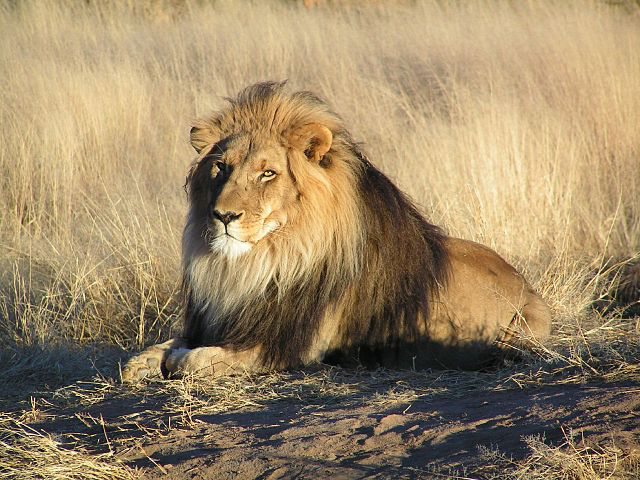

In [ ]:
img = Image.open('arq_files/leon.jpg')
img

In [ ]:
img.size

(640, 480)

(340, 255)


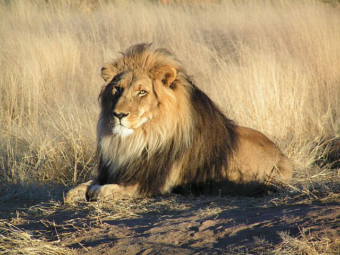

In [ ]:
# Pre procesamiento paso a paso
tr = T.Resize(255)

imgr = tr(img)

print(imgr.size)

imgr

(224, 224)


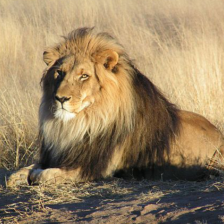

In [ ]:
tcc = T.CenterCrop(224)

imgcc = tcc(imgr)

print(imgcc.size)

imgcc

In [ ]:
# Mostrando las clases disponibles
clases

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [ ]:
pred = prediccion(alexnet, 'arq_files/perro.jpg')
print(f'Predicción = {pred}')

Predicción = ['n02099712', 'Labrador_retriever']


In [ ]:
def prediccion2(network, name):
  '''
  Predicción con grado de confidencia
  '''
  tensor = transformar_imagen(name)
  network.eval()
  pred = network(tensor)
  output = F.softmax(pred, dim=-1)
  conf,val = output.max(1)
  index = str(val.item())
  return output.detach().numpy(), dict({'conf':conf,'class':clases[index]})

In [ ]:
output, dic = prediccion2(alexnet, 'arq_files/tigre.jpg')

print(dic)

fig = px.line(x=range(len(clases)),y=output[0])
fig.update_layout(
    xaxis_title="Class index",
    yaxis_title="Confidence"
)
fig.show()

{'conf': tensor([0.7248], grad_fn=<MaxBackward0>), 'class': ['n02129604', 'tiger']}


torch.Size([64, 3, 11, 11])



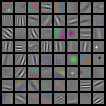

In [ ]:
# Visualización de filtros aprendidos
kernels = alexnet.features[0].weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max() # valores entre 0 y 1
print(kernels.shape)

img = make_grid(kernels)

px.imshow(img.permute(1,2,0)).show()

torch.Size([64, 1, 55, 55])



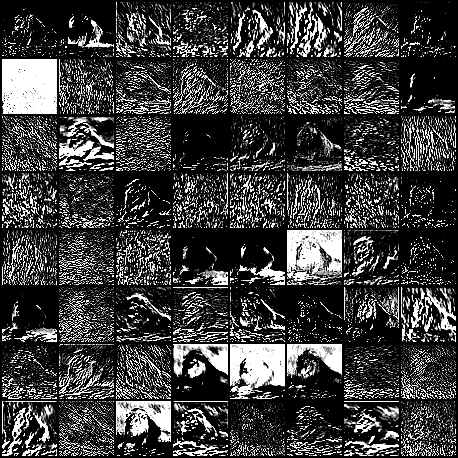

In [ ]:
# Visualización de mapas de activación
activation = {}

def get_activation(name):
  def hook(model, input, output):
    activation[name] = output.detach()
  return hook

alexnet.features[0].register_forward_hook(get_activation('conv1'))
_ = alexnet(transformar_imagen("arq_files/leon.jpg"))

act = activation['conv1'].squeeze() # (1, 64, 55, 55) => (64, 55, 55)
act = act.unsqueeze(1) # (64, 55, 55) => (64, 1, 55, 55)
print(act.shape)

img = make_grid(act, nrow=8, scale_each=True)

px.imshow(img.permute(1,2,0), zmin=[0,0,0], zmax=[1,1,1]).show()

### Tarea

* Realizar la predicción de la clase de una imágen con los modelos VGGNet, GoogleNet y ResNet.
* Elaborar un cuadro comparativo con el grado de confidencia por cada modelo para la imagen seleccionada.

Ejemplo:

| Modelo    | Confidence |
| ----------|       ---:|
| VGGNet    | 0.81      |
| GoogleNet | 0.88      |
| ResNet    | 0.96      |


In [ ]:
vggnet = models.vgg11_bn(pretrained=True)

In [ ]:
output, dic = prediccion2(vggnet, 'arq_files/tigre.jpg')

print(dic)

fig = px.line(x=range(len(clases)),y=output[0])
fig.update_layout(
    xaxis_title="Class index",
    yaxis_title="Confidence"
)
fig.show()

{'conf': tensor([0.9072], grad_fn=<MaxBackward0>), 'class': ['n02129604', 'tiger']}


In [ ]:
googlenet = models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [ ]:
output, dic = prediccion2(googlenet, 'arq_files/tigre.jpg')

print(dic)

fig = px.line(x=range(len(clases)),y=output[0])
fig.update_layout(
    xaxis_title="Class index",
    yaxis_title="Confidence"
)
fig.show()

{'conf': tensor([0.7360], grad_fn=<MaxBackward0>), 'class': ['n02129604', 'tiger']}


In [ ]:
resnet = models.resnet50(pretrained=True)

In [ ]:
output, dic = prediccion2(resnet, 'arq_files/tigre.jpg')

print(dic)

fig = px.line(x=range(len(clases)),y=output[0])
fig.update_layout(
    xaxis_title="Class index",
    yaxis_title="Confidence"
)
fig.show()

{'conf': tensor([0.9262], grad_fn=<MaxBackward0>), 'class': ['n02129604', 'tiger']}


| Modelo    | Confidence |
| ----------|       ---:|
| VGGNet    | 0.9072      |
| GoogleNet | 0.7360      |
| ResNet    | 0.9262      |
